# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
weather_soup = BeautifulSoup(html, 'html.parser')


In [6]:
# Find the table
table = weather_soup.find('table', class_='table')

# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for i, row in enumerate(rows):
    cells = row.find_all('th') if i == 0 else row.find_all('td')
    if i == 0:
        headers = [cell.text.strip() for cell in cells]
    else:
        data.append([cell.text.strip() for cell in cells])

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns=headers)

In [10]:
# Confirm DataFrame was created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date']) 
df['sol'] = df['sol'].astype(int) 
df['ls'] = df['ls'].astype(int) 
df['month'] = df['month'].astype(int) 
df['min_temp'] = df['min_temp'].astype(float) 
df['pressure'] = df['pressure'].astype(float)

In [13]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [24]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} months on Mars.\n")

There are 12 months on Mars.



In [25]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df['sol'].nunique() 
print(f"There are {num_sols} sols (Martian days) worth of data.\n") 

There are 1867 sols (Martian days) worth of data.



In [26]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean() 
print("Average minimum temperature by month:\n", avg_min_temp_by_month, "\n")

Average minimum temperature by month:
 month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64 



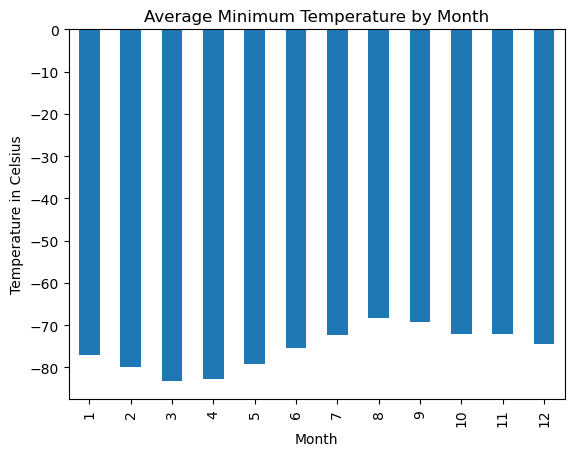

In [27]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar') 
plt.xlabel("Month") 
plt.ylabel("Temperature in Celsius") 
plt.title("Average Minimum Temperature by Month") 
plt.show()

In [28]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp_by_month.idxmin()
hottest_month = avg_min_temp_by_month.idxmax()
print(f"The coldest month is month {coldest_month} and the hottest month is month {hottest_month}.\n")

The coldest month is month 3 and the hottest month is month 8.



In [29]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean() 
print("Average pressure by month:\n", avg_pressure_by_month, "\n")

Average pressure by month:
 month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64 



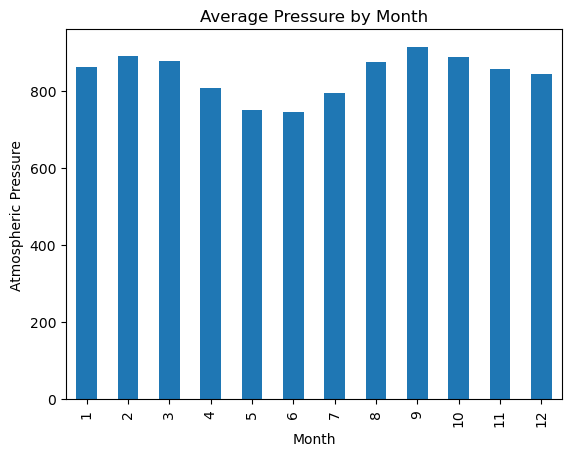

In [30]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar') 
plt.xlabel("Month") 
plt.ylabel("Atmospheric Pressure") 
plt.title("Average Pressure by Month") 
plt.show()

In [31]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"The month with the lowest pressure is month {lowest_pressure_month} and the month with the highest pressure is month {highest_pressure_month}.\n")

The month with the lowest pressure is month 6 and the month with the highest pressure is month 9.



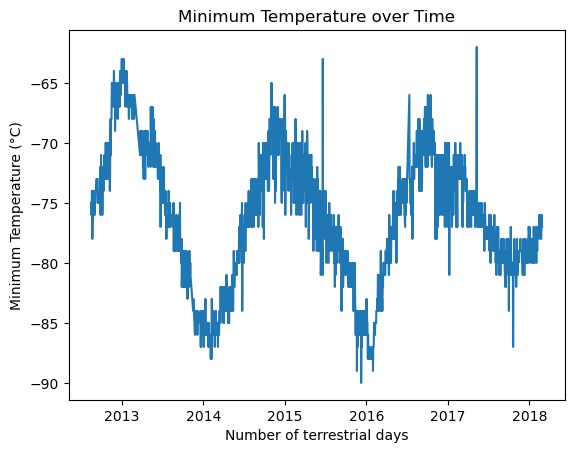

In [32]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.plot(df['terrestrial_date'], df['min_temp']) 
plt.xlabel("Number of terrestrial days") 
plt.ylabel("Minimum Temperature (°C)")
plt.title("Minimum Temperature over Time") 
plt.show()

#### Minimum Temperature
The average minimum numbers by month are all negative, which means they're below freezing.  The coldest months are around months 3 and 4, where the temperature drops to about -83 degrees Celsius.  The "warmest" month is month 8, but even then, it's still a very cold -68 degrees Celsius.  So, this data tells us that Mars is a consistently cold place, with some months being just a little bit less cold than others.


#### Atmospheric Pressure
The data highlights the dynamic nature of Mars's atmosphere and its seasonal fluctuations. Months 5 and 6 exhibit the lowest average pressures, falling below 750 units, indicating a period of relatively thin atmosphere.  Months 2 and 9 demonstrate the highest average pressures, exceeding 880 and 900 units respectively, signifying denser atmospheric conditions. The remaining months show intermediate pressure levels, fluctuating between these extremes. 
 

#### Year Length
the Minimum Temperature over Time graph shows the daily minimum temperature on Mars over several Earth years, from 2013 to 2018. The temperatures are consistently very cold, ranging from about -65°C to -85°C, highlighting the frigid Martian climate. We can observe a clear cyclical pattern, with peaks and valleys indicating seasonal changes. The peaks, where temperatures are relatively "warmer," occur roughly every two Earth years, suggesting that a Martian year is approximately twice the length of an Earth year. This pattern allows us to visually estimate the length of a Martian year by measuring the time between repeating temperature trends.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [22]:
browser.quit()